In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('sample.csv')

In [3]:
data.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,75.65,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,3.0,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,48.87,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,2.0,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,47.68,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [4]:
pd.set_option('display.max_columns',1000)

In [5]:
data=data.drop(columns=['type_of_breast_surgery','oncotree_code','cancer_type_detailed','tumor_size','tumor_stage'])

In [6]:
data.loc[data['er_status_measured_by_ihc'].isna(), 'er_status_measured_by_ihc'] = data['er_status']

In [7]:
cols=list(data.columns.values)
for i in cols:
    if(data[i].isna().sum()!=0):
        print(i,data[i].isna().sum())
        

cellularity 54
neoplasm_histologic_grade 72
primary_tumor_laterality 106
mutation_count 45
3-gene_classifier_subtype 166
death_from_cancer 1


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data'
# Filter out rows with null values in the specified columns
filtered_data = data[['neoplasm_histologic_grade', 'tumor_size']].dropna()

# Create the pairwise plot
sns.pairplot(filtered_data, x_vars='neoplasm_histologic_grade', y_vars='tumor_size')
plt.title('Pairwise Plot: Neoplasm Histologic Grade vs Tumor Size')
plt.show()


KeyError: "['tumor_size'] not in index"

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'data'
# Filter the data
count_na = data[(data['tumor_size'] > 100) & (data['neoplasm_histologic_grade'].isna())].shape[0]

print(f"Count of NaN neoplasm histologic grade when tumor size > 100: {count_na}")


In [9]:
data['nottingham_prognostic_index'].isna().sum()

0

In [10]:
data.loc[data['death_from_cancer'].isna()]

,age_at_diagnosis,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,death_from_cancer
1166,58.61,Low,0,LumA,3.0,Positve,Positive,3.0,LOSS,Negative,Ductal/NST,0,Post,7,Right,0.0,13.0,4.03,255.0,0,Positive,1,ER+/HER2- High Prolif,NaN


In [ ]:
cohort_data = data[data['cohort'] == 3.0]
cohort_data

pd.set_option('display.max_rows',1000)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data'
# Filter out rows with NaN values in the relevant columns
filtered_data = data[['overall_survival_months', 'death_from_cancer']].dropna()

# Create a box plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='death_from_cancer', y='overall_survival_months')
plt.title('Overall Survival Months by Death from Cancer')
plt.xlabel('Death from Cancer')
plt.ylabel('Overall Survival Months')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
data['death_from_cancer'] = data['death_from_cancer'].fillna('Died of Other Causes')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data'
# Filter out rows with NaN values in the relevant columns
filtered_data = data[['mutation_count', 'cellularity']].dropna()

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='mutation_count', y='cellularity', alpha=0.6)
plt.title('Relationship between Mutation Count and Cellularity')
plt.xlabel('Mutation Count')
plt.ylabel('Cellularity')
plt.tight_layout()
plt.show()


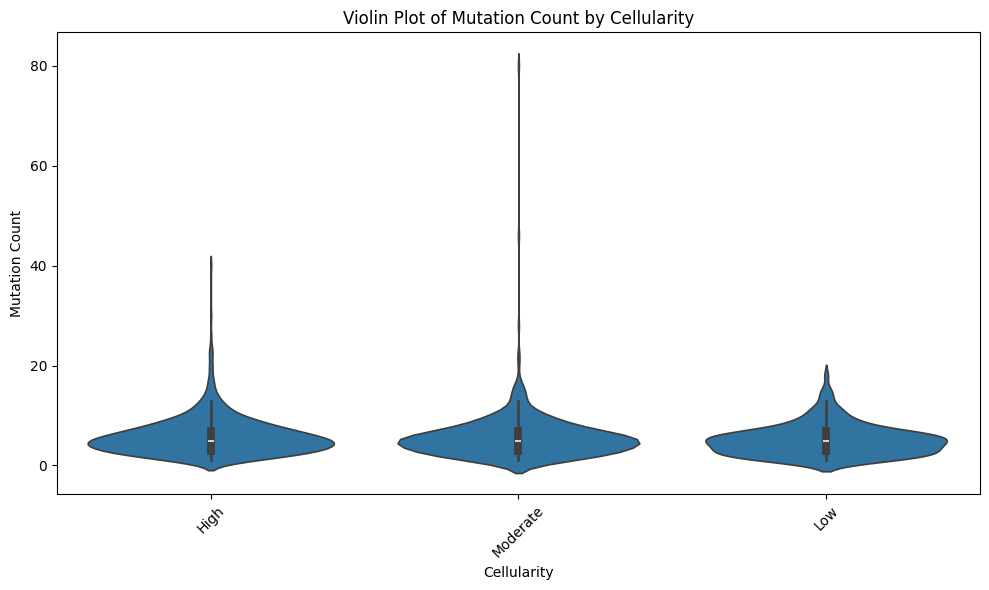

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data'
# Filter out rows with NaN values in the relevant columns
filtered_data = data[['mutation_count', 'cellularity']].dropna()

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_data, x='cellularity', y='mutation_count')
plt.title('Violin Plot of Mutation Count by Cellularity')
plt.xlabel('Cellularity')
plt.ylabel('Mutation Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:

missing_subtype_rows = data[data['3-gene_classifier_subtype'].isna()]
missing_subtype_rows


,age_at_diagnosis,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,death_from_cancer
2,48.87,High,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Pre,3,Right,1.0,2.0,4.030,163.700000,0,Positive,0,NaN,Died of Disease
3,47.68,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3.0,1.0,4.050,164.933333,1,Positive,1,NaN,Living
6,56.45,Moderate,1,LumB,1.0,Positve,Positive,2.0,LOSS,Negative,Ductal/NST,1,Post,3,Right,1.0,4.0,4.020,164.333333,1,Positive,1,NaN,Living
7,89.08,Moderate,0,claudin-low,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Post,3,Left,1.0,1.0,4.058,99.533333,0,Negative,1,NaN,Died of Other Causes
11,70.91,High,0,LumB,1.0,Positve,Positive,1.0,GAIN,Negative,Ductal/NST,1,Post,4ER+,Left,0.0,3.0,2.042,163.533333,1,Positive,1,NaN,Living
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,58.56,High,0,LumA,4.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Left,0.0,15.0,3.040,155.400000,1,Negative,1,NaN,Living
1826,58.75,High,1,LumB,4.0,Positve,Positive,2.0,LOSS,Negative,Ductal/NST,1,Post,1,Right,1.0,1.0,4.042,143.600000,0,Negative,1,NaN,Died of Disease
1875,59.82,Moderate,0,LumB,4.0,Positve,Positive,1.0,NEUTRAL,Negative,Ductal/NST,1,Post,9,NaN,1.0,4.0,3.080,68.166667,0,Positive,1,NaN,Died of Disease
1900,42.88,High,0,LumB,4.0,Positve,Positive,3.0,GAIN,Positive,Ductal/NST,0,Pre,5,NaN,1.0,6.0,5.040,44.733333,0,Negative,1,NaN,Died of Disease


In [19]:
data.to_csv('sample_to_ml.csv',index=False)

In [20]:
data=pd.read_csv('sample_to_ml.csv')

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [47]:
print(data.isna().sum())


age_at_diagnosis                    0
cellularity                        54
chemotherapy                        0
pam50_+_claudin-low_subtype         0
cohort                              0
er_status_measured_by_ihc           0
er_status                           0
neoplasm_histologic_grade          72
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype      0
hormone_therapy                     0
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
lymph_nodes_examined_positive       0
mutation_count                     45
nottingham_prognostic_index         0
overall_survival_months             0
overall_survival                    0
pr_status                           0
radio_therapy                       0
3-gene_classifier_subtype           0
death_from_cancer                   0
dtype: int64


In [25]:
predict_rows=data.loc[data['3-gene_classifier_subtype'].isna()]
test_rows=data.loc[~data['3-gene_classifier_subtype'].isna()]

In [27]:
X = test_rows[['er_status_measured_by_ihc', 'her2_status', 'lymph_nodes_examined_positive']]
y = test_rows['3-gene_classifier_subtype']

In [28]:
y = pd.Categorical(y)

In [29]:
y

['ER-/HER2-', 'ER+/HER2- High Prolif', 'ER+/HER2- High Prolif', 'ER+/HER2- High Prolif', 'ER+/HER2- High Prolif', ..., 'ER+/HER2- Low Prolif', 'ER+/HER2- High Prolif', 'ER+/HER2- Low Prolif', 'ER+/HER2- High Prolif', 'ER+/HER2- High Prolif']
Length: 1738
Categories (4, object): ['ER+/HER2- High Prolif', 'ER+/HER2- Low Prolif', 'ER-/HER2-', 'HER2+']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['er_status_measured_by_ihc', 'her2_status']),
        ('num', StandardScaler(), ['lymph_nodes_examined_positive'])
    ])


In [33]:
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])

pipeline_svc = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(random_state=42))])

pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(random_state=42))])

In [34]:
# Define parameter grids for each model
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
}

param_grid_svc = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
}

param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
}

# Perform grid search for RandomForest
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

# Perform grid search for SVC
grid_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5)
grid_svc.fit(X_train, y_train)

# Perform grid search for Logistic Regression
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)


C:\Users\ashik\codes\breast_cancer_cluster\benv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashik\codes\breast_cancer_cluster\benv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['er_status_measured_by_ihc',
                                                                          'her2_status']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['lymph_nodes_examined_positive'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.1, 1, 10]})

In [35]:
# Predictions
pred_rf = grid_rf.predict(X_test)
pred_svc = grid_svc.predict(X_test)
pred_lr = grid_lr.predict(X_test)

# Print classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, pred_rf))

print("SVC Classification Report:")
print(classification_report(y_test, pred_svc))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, pred_lr))

# Print confusion matrices
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, pred_rf))

print("SVC Confusion Matrix:")
print(confusion_matrix(y_test, pred_svc))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, pred_lr))


Random Forest Classification Report:
                       precision    recall  f1-score   support

ER+/HER2- High Prolif       0.46      0.46      0.46       108
 ER+/HER2- Low Prolif       0.55      0.56      0.55       136
            ER-/HER2-       0.74      0.74      0.74        58
                HER2+       0.81      0.74      0.77        46

             accuracy                           0.58       348
            macro avg       0.64      0.63      0.63       348
         weighted avg       0.59      0.58      0.58       348

SVC Classification Report:
                       precision    recall  f1-score   support

ER+/HER2- High Prolif       0.46      0.47      0.47       108
 ER+/HER2- Low Prolif       0.55      0.55      0.55       136
            ER-/HER2-       0.75      0.74      0.75        58
                HER2+       0.80      0.78      0.79        46

             accuracy                           0.59       348
            macro avg       0.64      0.64      0

In [36]:
predictions = grid_svc.predict(predict_rows[['er_status_measured_by_ihc', 'her2_status', 'lymph_nodes_examined_positive']])


In [37]:
predict_rows['predicted_3-gene_classifier_subtype'] = predictions

print(predict_rows)


      age_at_diagnosis cellularity  chemotherapy pam50_+_claudin-low_subtype  \
2                48.87        High             1                        LumB   
3                47.68    Moderate             1                        LumB   
6                56.45    Moderate             1                        LumB   
7                89.08    Moderate             0                 claudin-low   
11               70.91        High             0                        LumB   
...                ...         ...           ...                         ...   
1815             58.56        High             0                        LumA   
1826             58.75        High             1                        LumB   
1875             59.82    Moderate             0                        LumB   
1900             42.88        High             0                        LumB   
1901             62.90        High             0                        LumB   

      cohort er_status_measured_by_ihc 

C:\Users\ashik\AppData\Local\Temp\ipykernel_7996\3889029510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_rows['predicted_3-gene_classifier_subtype'] = predictions


In [41]:
predict_rows

,age_at_diagnosis,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,death_from_cancer,predicted_3-gene_classifier_subtype
2,48.87,High,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Pre,3,Right,1.0,2.0,4.030,163.700000,0,Positive,0,NaN,Died of Disease,ER+/HER2- High Prolif
3,47.68,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3.0,1.0,4.050,164.933333,1,Positive,1,NaN,Living,ER+/HER2- High Prolif
6,56.45,Moderate,1,LumB,1.0,Positve,Positive,2.0,LOSS,Negative,Ductal/NST,1,Post,3,Right,1.0,4.0,4.020,164.333333,1,Positive,1,NaN,Living,ER+/HER2- High Prolif
7,89.08,Moderate,0,claudin-low,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Post,3,Left,1.0,1.0,4.058,99.533333,0,Negative,1,NaN,Died of Other Causes,ER+/HER2- High Prolif
11,70.91,High,0,LumB,1.0,Positve,Positive,1.0,GAIN,Negative,Ductal/NST,1,Post,4ER+,Left,0.0,3.0,2.042,163.533333,1,Positive,1,NaN,Living,ER+/HER2- Low Prolif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,58.56,High,0,LumA,4.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Left,0.0,15.0,3.040,155.400000,1,Negative,1,NaN,Living,ER+/HER2- Low Prolif
1826,58.75,High,1,LumB,4.0,Positve,Positive,2.0,LOSS,Negative,Ductal/NST,1,Post,1,Right,1.0,1.0,4.042,143.600000,0,Negative,1,NaN,Died of Disease,ER+/HER2- High Prolif
1875,59.82,Moderate,0,LumB,4.0,Positve,Positive,1.0,NEUTRAL,Negative,Ductal/NST,1,Post,9,NaN,1.0,4.0,3.080,68.166667,0,Positive,1,NaN,Died of Disease,ER+/HER2- High Prolif
1900,42.88,High,0,LumB,4.0,Positve,Positive,3.0,GAIN,Positive,Ductal/NST,0,Pre,5,NaN,1.0,6.0,5.040,44.733333,0,Negative,1,NaN,Died of Disease,HER2+


In [43]:
indices_to_print = [2, 3, 6, 7, 11, 1815]
data.loc[indices_to_print]

,age_at_diagnosis,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,death_from_cancer
2,48.87,High,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Pre,3,Right,1.0,2.0,4.030,163.700000,0,Positive,0,NaN,Died of Disease
3,47.68,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3.0,1.0,4.050,164.933333,1,Positive,1,NaN,Living
6,56.45,Moderate,1,LumB,1.0,Positve,Positive,2.0,LOSS,Negative,Ductal/NST,1,Post,3,Right,1.0,4.0,4.020,164.333333,1,Positive,1,NaN,Living
7,89.08,Moderate,0,claudin-low,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Post,3,Left,1.0,1.0,4.058,99.533333,0,Negative,1,NaN,Died of Other Causes
11,70.91,High,0,LumB,1.0,Positve,Positive,1.0,GAIN,Negative,Ductal/NST,1,Post,4ER+,Left,0.0,3.0,2.042,163.533333,1,Positive,1,NaN,Living
1815,58.56,High,0,LumA,4.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Left,0.0,15.0,3.040,155.400000,1,Negative,1,NaN,Living


In [44]:
# Ensure both DataFrames have the same index and update where '3-gene_classifier_subtype' is NaN
data.loc[data['3-gene_classifier_subtype'].isna(), '3-gene_classifier_subtype'] = predict_rows['predicted_3-gene_classifier_subtype']


In [46]:
data.to_csv('3gene_filled.csv',index=False)